# **HYPOTHESIS TESTING -1 BUYER RATIO**

In [35]:
get_ipython().run_line_magic('matplotlib', 'inline')
import numpy as np
import scipy as sp
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest

In [36]:
# # Load Dataset

In [37]:
BuyerRatio =pd.read_csv('/content/BuyerRatio.csv')
BuyerRatio.head(10)

,Observed Values,East,West,North,South
0,Males,50,142,131,70
1,Females,435,1523,1356,750


In [38]:
BuyerRatio.shape

(2, 5)

In [39]:
BuyerRatio.dtypes

Observed Values    object
East                int64
West                int64
North               int64
South               int64
dtype: object

In [40]:
BuyerRatio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Observed Values  2 non-null      object
 1   East             2 non-null      int64 
 2   West             2 non-null      int64 
 3   North            2 non-null      int64 
 4   South            2 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 208.0+ bytes


In [41]:
BuyerRatio.describe()

,East,West,North,South
count,2.000000,2.000000,2.000000,2.000000
mean,242.500000,832.500000,743.500000,410.000000
std,272.236111,976.514465,866.205807,480.832611
min,50.000000,142.000000,131.000000,70.000000
25%,146.250000,487.250000,437.250000,240.000000
50%,242.500000,832.500000,743.500000,410.000000
75%,338.750000,1177.750000,1049.750000,580.000000
max,435.000000,1523.000000,1356.000000,750.000000


In [42]:
East=BuyerRatio['East'].mean()
print('East Mean = ',East)

East Mean =  242.5


In [43]:
West=BuyerRatio['West'].mean()
print('West Mean = ',West)

West Mean =  832.5


In [44]:
North=BuyerRatio['North'].mean()
print('North Mean = ',North)

North Mean =  743.5


In [45]:
South=BuyerRatio['South'].mean()
print('South Mean = ',South)

South Mean =  410.0


In [46]:
# The Null and Alternative Hypothesis

# There are no significant differences between the groups' mean values. H0:μ1=μ2=μ3=μ4=μ5

# There is a significant difference between the groups' mean values. Ha:μ1≠μ2≠μ3≠μ4

In [47]:
# # Visualization

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


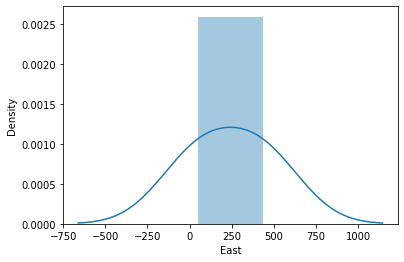

In [48]:
sns.distplot(BuyerRatio['East'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


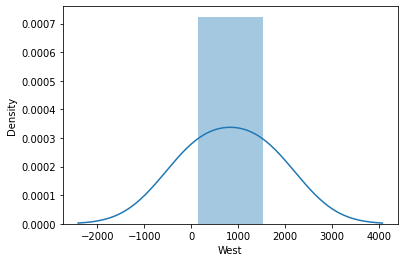

In [49]:
sns.distplot(BuyerRatio['West'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


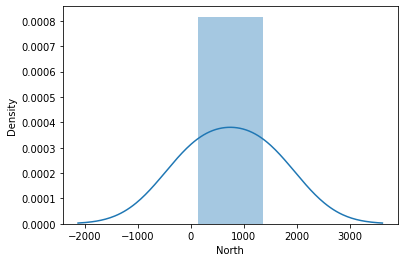

In [50]:
sns.distplot(BuyerRatio['North'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


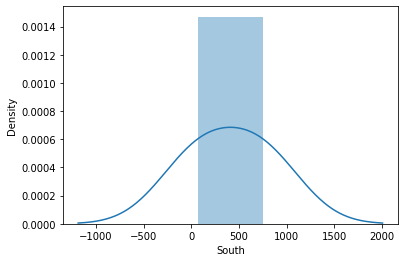

In [51]:
sns.distplot(BuyerRatio['South'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

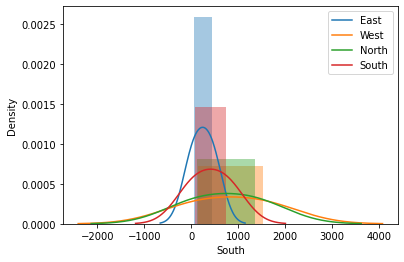

In [52]:
sns.distplot(BuyerRatio['East'])
sns.distplot(BuyerRatio['West'])
sns.distplot(BuyerRatio['North'])
sns.distplot(BuyerRatio['South'])
plt.legend(['East','West','North','South'])

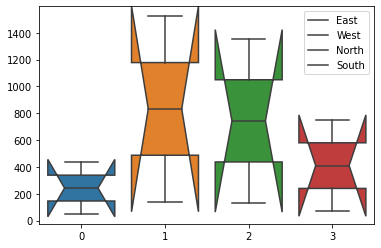

In [53]:
sns.boxplot(data=[BuyerRatio['East'],BuyerRatio['West'],BuyerRatio['North'],BuyerRatio['South']],notch=True)
plt.legend(['East','West','North','South'])


In [54]:
# # Hypothesis Testing

In [55]:
alpha=0.05
Male = [50,142,131,70]
Female=[435,1523,1356,750]
Sales=[Male,Female]
print(Sales)

[[50, 142, 131, 70], [435, 1523, 1356, 750]]


In [56]:
chiStats = sp.stats.chi2_contingency(Sales)
print('Test t=%f p-value=%f' % (chiStats[0], chiStats[1]))
print('Interpret by p-Value')

Test t=1.595946 p-value=0.660309
Interpret by p-Value


In [57]:
if chiStats[1] < 0.05:
  print('we reject null hypothesis')
else:
  print('we accept null hypothesis')

we accept null hypothesis


In [58]:
# # Critical Value

In [59]:
alpha = 0.05
critical_value = sp.stats.chi2.ppf(q = 1 - alpha,df=chiStats[2])
critical_value 

7.814727903251179

In [60]:
# # Degree of Freedom

In [61]:
observed_chi_val = chiStats[0]
print('Interpret by critical value')

Interpret by critical value


In [62]:
if observed_chi_val <= critical_value:
    print ('Null hypothesis cannot be rejected (variables are not related)')
else:
    print ('Null hypothesis cannot be excepted (variables are not independent)')

Null hypothesis cannot be rejected (variables are not related)


In [63]:
#Inference : proportion of male and female across regions is same

# **HYPOTHESIS TESTING -2 CUTLETS**

In [64]:
# # Import Libraries

In [65]:
get_ipython().run_line_magic('matplotlib', 'inline')
import numpy as np
import scipy as sp
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest

In [66]:
# # Load Dataset

In [ ]:
data1 = pd.read_csv("/content/Cutlets.csv")
data1.head(10)

In [68]:
data1.shape

(35, 2)

In [69]:
data1.dtypes

Unit A    float64
Unit B    float64
dtype: object

In [ ]:
data1.info()

In [ ]:
data1.describe(include='all')

In [72]:
Unit_A=data1['Unit A'].mean()

In [73]:
Unit_B=data1['Unit B'].mean()

In [74]:
print('Unit A Mean = ',Unit_A, '\nUnit B Mean = ',Unit_B)

Unit A Mean =  7.01909142857143 
Unit B Mean =  6.964297142857142


In [75]:
print('Unit A Mean > Unit B Mean = ',Unit_A>Unit_B)

Unit A Mean > Unit B Mean =  True


In [76]:
# # Visualization

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


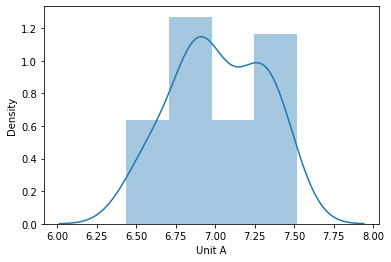

In [77]:
sns.distplot(data1['Unit A'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


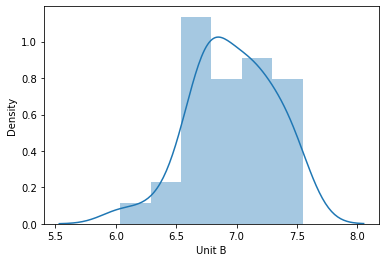

In [78]:
sns.distplot(data1['Unit B'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


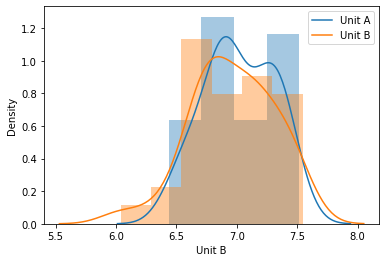

In [79]:
sns.distplot(data1['Unit A'])
sns.distplot(data1['Unit B'])
plt.legend(['Unit A','Unit B'])

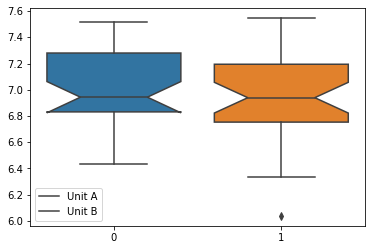

In [80]:
sns.boxplot(data=[data1['Unit A'],data1['Unit B']],notch=True)
plt.legend(['Unit A','Unit B'])

In [81]:
# # Hypothesis Testing

In [ ]:
alpha=0.05
UnitA=pd.DataFrame(data1['Unit A'])
UnitA

In [ ]:
UnitB=pd.DataFrame(data1['Unit B'])
UnitB

In [ ]:
print(UnitA,UnitB)

In [85]:
tStat,pValue =sp.stats.ttest_ind(UnitA,UnitB)

In [86]:
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat))

P-Value:[0.47223947] T-Statistic:[0.72286887]


In [87]:
if pValue <0.05:
  print('we reject null hypothesis')
else:
  print('we accept null hypothesis')

we accept null hypothesis


In [88]:
#Inference is that there is no significant difference in the diameters of Unit A and Unit B

# **HYPOTHESIS TESTING -3 LabTAT**

In [89]:
# # Import Libraries

In [90]:
get_ipython().run_line_magic('matplotlib', 'inline')
import numpy as np
import scipy as sp
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest

In [91]:
# # Load Dataset

In [92]:
LabTAT =pd.read_csv("/content/LabTAT.csv")
LabTAT.head(10)

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
0,185.35,165.53,176.70,166.13
1,170.49,185.91,198.45,160.79
2,192.77,194.92,201.23,185.18
3,177.33,183.00,199.61,176.42
4,193.41,169.57,204.63,152.60
5,179.45,197.00,181.51,161.12
6,191.37,166.36,214.21,154.02
7,166.81,169.60,183.43,163.25
8,158.81,175.36,191.60,152.79
9,165.88,198.68,208.43,161.98


In [93]:
LabTAT.shape

(120, 4)

In [94]:
LabTAT.dtypes

Laboratory 1    float64
Laboratory 2    float64
Laboratory 3    float64
Laboratory 4    float64
dtype: object

In [95]:
LabTAT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Laboratory 1  120 non-null    float64
 1   Laboratory 2  120 non-null    float64
 2   Laboratory 3  120 non-null    float64
 3   Laboratory 4  120 non-null    float64
dtypes: float64(4)
memory usage: 3.9 KB


In [96]:
LabTAT.describe()

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
count,120.000000,120.000000,120.000000,120.00000
mean,178.361583,178.902917,199.913250,163.68275
std,13.173594,14.957114,16.539033,15.08508
min,138.300000,140.550000,159.690000,124.06000
25%,170.335000,168.025000,188.232500,154.05000
50%,178.530000,178.870000,199.805000,164.42500
75%,186.535000,189.112500,211.332500,172.88250
max,216.390000,217.860000,238.700000,205.18000


In [97]:
Laboratory_1=LabTAT['Laboratory 1'].mean()
print('Laboratory 1 Mean = ',Laboratory_1)

Laboratory 1 Mean =  178.36158333333339


In [98]:
Laboratory_2=LabTAT['Laboratory 2'].mean()
print('Laboratory 2 Mean = ',Laboratory_2)

Laboratory 2 Mean =  178.9029166666668


In [99]:
Laboratory_3=LabTAT['Laboratory 3'].mean()
print('Laboratory 3 Mean = ',Laboratory_3)

Laboratory 3 Mean =  199.91325000000003


In [100]:
Laboratory_4=LabTAT['Laboratory 4'].mean()
print('Laboratory 4 Mean = ',Laboratory_4)

Laboratory 4 Mean =  163.6827499999999


In [101]:
print('Laboratory_1 > Laboratory_2 = ',Laboratory_1 > Laboratory_2)
print('Laboratory_2 > Laboratory_3 = ',Laboratory_2 > Laboratory_3)
print('Laboratory_3 > Laboratory_4 = ',Laboratory_3 > Laboratory_4)
print('Laboratory_4 > Laboratory_1 = ',Laboratory_4 > Laboratory_1)


Laboratory_1 > Laboratory_2 =  False
Laboratory_2 > Laboratory_3 =  False
Laboratory_3 > Laboratory_4 =  True
Laboratory_4 > Laboratory_1 =  False


In [102]:
# The Null and Alternative Hypothesis

# There are no significant differences between the groups' mean Lab values. H0:μ1=μ2=μ3=μ4

# There is a significant difference between the groups' mean Lab values. Ha:μ1≠μ2≠μ3≠μ4


In [103]:
# # Visualization

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


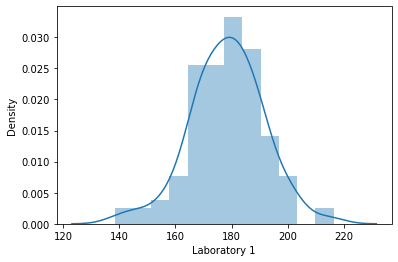

In [104]:
sns.distplot(LabTAT['Laboratory 1'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


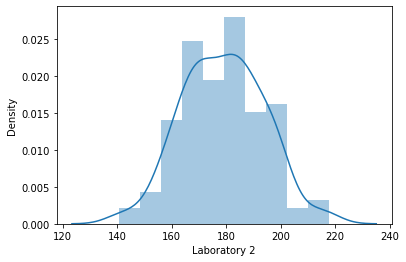

In [105]:
sns.distplot(LabTAT['Laboratory 2'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


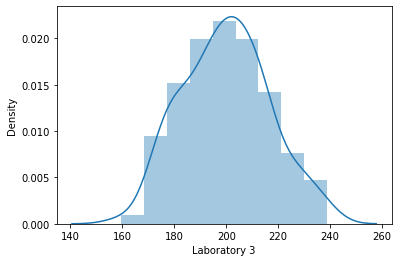

In [106]:
sns.distplot(LabTAT['Laboratory 3'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


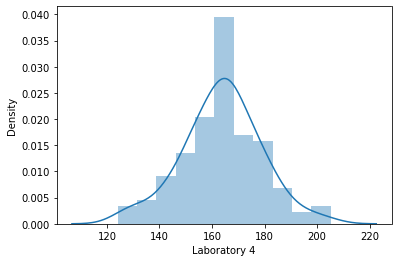

In [107]:
sns.distplot(LabTAT['Laboratory 4'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

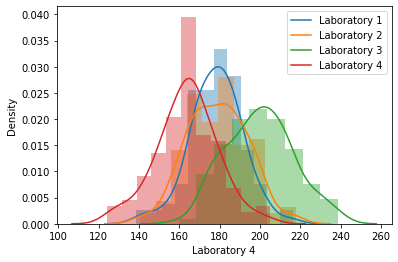

In [108]:
sns.distplot(LabTAT['Laboratory 1'])
sns.distplot(LabTAT['Laboratory 2'])
sns.distplot(LabTAT['Laboratory 3'])
sns.distplot(LabTAT['Laboratory 4'])
plt.legend(['Laboratory 1','Laboratory 2','Laboratory 3','Laboratory 4'])


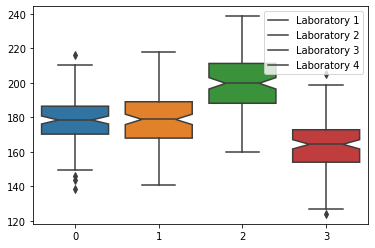

In [109]:
sns.boxplot(data=[LabTAT['Laboratory 1'],LabTAT['Laboratory 2'],LabTAT['Laboratory 3'],LabTAT['Laboratory 4']],notch=True)
plt.legend(['Laboratory 1','Laboratory 2','Laboratory 3','Laboratory 4'])


In [110]:
# # Hypothesis Testing

In [111]:
alpha=0.05
Lab1=pd.DataFrame(LabTAT['Laboratory 1'])
Lab1

,Laboratory 1
0,185.35
1,170.49
2,192.77
3,177.33
4,193.41
...,...
115,178.49
116,176.08
117,202.48
118,182.40


In [112]:
Lab2=pd.DataFrame(LabTAT['Laboratory 2'])
Lab2

,Laboratory 2
0,165.53
1,185.91
2,194.92
3,183.00
4,169.57
...,...
115,170.66
116,183.98
117,174.54
118,197.18


In [113]:
Lab3=pd.DataFrame(LabTAT['Laboratory 3'])
Lab3

,Laboratory 3
0,176.70
1,198.45
2,201.23
3,199.61
4,204.63
...,...
115,193.80
116,215.25
117,203.99
118,194.52


In [114]:
Lab4=pd.DataFrame(LabTAT['Laboratory 4'])
Lab4

,Laboratory 4
0,166.13
1,160.79
2,185.18
3,176.42
4,152.60
...,...
115,172.68
116,177.64
117,170.27
118,150.87


In [115]:
print(Lab1,Lab1,Lab3,Lab4)

     Laboratory 1
0          185.35
1          170.49
2          192.77
3          177.33
4          193.41
..            ...
115        178.49
116        176.08
117        202.48
118        182.40
119        182.09

[120 rows x 1 columns]      Laboratory 1
0          185.35
1          170.49
2          192.77
3          177.33
4          193.41
..            ...
115        178.49
116        176.08
117        202.48
118        182.40
119        182.09

[120 rows x 1 columns]      Laboratory 3
0          176.70
1          198.45
2          201.23
3          199.61
4          204.63
..            ...
115        193.80
116        215.25
117        203.99
118        194.52
119        221.49

[120 rows x 1 columns]      Laboratory 4
0          166.13
1          160.79
2          185.18
3          176.42
4          152.60
..            ...
115        172.68
116        177.64
117        170.27
118        150.87
119        162.21

[120 rows x 1 columns]


In [116]:
tStat, pvalue = sp.stats.f_oneway(Lab1,Lab2,Lab3,Lab4)

In [117]:
print("P-Value:{0} T-Statistic:{1}".format(pvalue,tStat))

P-Value:[2.11567089e-57] T-Statistic:[118.70421654]


In [118]:
if pvalue < 0.05:
  print('we reject null hypothesis')
else:
  print('we accept null hypothesis')

we reject null hypothesis


In [119]:
#Inference is that there no significant difference in the average TAT for all the labs.

# **HYPOTHESIS TESTING -4 CUSTOMER ORDER**

In [120]:
# # Import Libraries

In [121]:
get_ipython().run_line_magic('matplotlib', 'inline')
import numpy as np
import scipy as sp
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest

In [122]:
# # Load Dataset

In [123]:
Customer = pd.read_csv('/content/Costomer+OrderForm.csv')
Customer.head(10)

,Phillippines,Indonesia,Malta,India
0,Error Free,Error Free,Defective,Error Free
1,Error Free,Error Free,Error Free,Defective
2,Error Free,Defective,Defective,Error Free
3,Error Free,Error Free,Error Free,Error Free
4,Error Free,Error Free,Defective,Error Free
5,Error Free,Error Free,Error Free,Error Free
6,Error Free,Defective,Error Free,Error Free
7,Error Free,Error Free,Error Free,Error Free
8,Error Free,Error Free,Error Free,Error Free
9,Error Free,Error Free,Error Free,Error Free


In [124]:
Customer.shape

(300, 4)

In [125]:
Customer.dtypes

Phillippines    object
Indonesia       object
Malta           object
India           object
dtype: object

In [126]:
Customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Phillippines  300 non-null    object
 1   Indonesia     300 non-null    object
 2   Malta         300 non-null    object
 3   India         300 non-null    object
dtypes: object(4)
memory usage: 9.5+ KB


In [127]:
Customer.describe()

,Phillippines,Indonesia,Malta,India
count,300,300,300,300
unique,2,2,2,2
top,Error Free,Error Free,Error Free,Error Free
freq,271,267,269,280


In [128]:
Phillippines_value=Customer['Phillippines'].value_counts()
print(Phillippines_value)

Error Free    271
Defective      29
Name: Phillippines, dtype: int64


In [129]:
Indonesia_value=Customer['Indonesia'].value_counts()
print(Indonesia_value)

Error Free    267
Defective      33
Name: Indonesia, dtype: int64


In [130]:
Malta_value=Customer['Malta'].value_counts()
print(Malta_value)

Error Free    269
Defective      31
Name: Malta, dtype: int64


In [131]:
India_value=Customer['India'].value_counts()
print(India_value)

Error Free    280
Defective      20
Name: India, dtype: int64


In [132]:
# # Hypothesis Testing

In [133]:
chiStats = sp.stats.chi2_contingency([[271,267,269,280],[29,33,31,20]])

In [134]:
print('Test t=%f p-value=%f' % (chiStats[0], chiStats[1]))

Test t=3.858961 p-value=0.277102


In [135]:
print('Interpret by p-Value')


Interpret by p-Value


In [136]:
if chiStats[1] < 0.05:
  print('we reject null hypothesis')
else:
  print('we accept null hypothesis')

we accept null hypothesis


In [137]:
# # Critical Value

In [138]:
#critical value = 0.1
alpha = 0.05
critical_value = sp.stats.chi2.ppf(q = 1 - alpha,df=chiStats[2])
observed_chi_val = chiStats[0]

In [139]:
print('Interpret by critical value')

Interpret by critical value


In [140]:
if observed_chi_val <= critical_value:
       print ('Null hypothesis cannot be rejected (variables are not related)')
else:
       print ('Null hypothesis cannot be excepted (variables are not independent)')

Null hypothesis cannot be rejected (variables are not related)


In [141]:
#Inference is that proportion of defective % across the center is same.
